In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential #base keras model
from keras.layers import Dense, Activation #dense = fully connected layer
from tensorflow.keras.optimizers import SGD

In [2]:
import pandas as pd
from sklearn.feature_extraction import _stop_words
from sklearn.metrics.pairwise import cosine_similarity as cosine
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [89]:
from keras.layers import Dropout, LSTM, Bidirectional

In [31]:
df = pd.read_csv("data/seattle-weather.csv")

In [8]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [32]:
data = pd.get_dummies(df['weather'])

In [33]:
data

,drizzle,fog,rain,snow,sun
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
1456,0,0,1,0,0
1457,0,0,1,0,0
1458,0,1,0,0,0
1459,0,0,0,0,1


In [38]:
X_train, X_test, y_train, y_test = train_test_split(data, df['precipitation'], test_size=0.2, random_state=0)

In [60]:
from keras.preprocessing import sequence 

X_train = sequence.pad_sequences(X_train, maxlen=5) 
X_test = sequence.pad_sequences(X_test, maxlen=5)

ValueError: invalid literal for int() with base 10: 'izzle'

In [39]:
np.shape(X_train)

(1168, 5)

In [40]:
np.shape(y_train)

(1168,)

In [46]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(y_train)

KeyError: 0

In [19]:
? len

In [47]:
#Now let's make a simple neural network with 1 hidden layer containing 10 neurons
num_neurons = 50 # neurons in each layer
model = Sequential()

#Make the first (hidden) layer, which will have num_neurons neurons. Each neuron will get inputs from all columns of the dataframe, except sentiment
#model.add(Dense(num_neurons, input_dim=len(data.columns)-1))
model.add(Dense(num_neurons, input_dim=np.shape(X_train)[1]))
model.add(Activation('sigmoid')) #Now we'll use a sigmoid activation function

#model.add(Dense(10, input_dim=50))
model.add(Dense(num_neurons))
model.add(Activation('sigmoid'))

#Now let's add another layer for the output: A single sigmoid neuron.
model.add(Dense(1)) 
model.add(Activation('sigmoid'))


In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable pa

In [43]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
37/37 [==============================] - 4s 6ms/step - loss: 0.0000e+00 - accuracy: 0.5668 - val_loss: 0.0000e+00 - val_accuracy: 0.5017
Epoch 2/10
37/37 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0771 - val_loss: 0.0000e+00 - val_accuracy: 0.0205
Epoch 3/10
37/37 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0171 - val_loss: 0.0000e+00 - val_accuracy: 0.0205
Epoch 4/10
37/37 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0171 - val_loss: 0.0000e+00 - val_accuracy: 0.0205
Epoch 5/10
37/37 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0171 - val_loss: 0.0000e+00 - val_accuracy: 0.0205
Epoch 6/10
37/37 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0171 - val_loss: 0.0000e+00 - val_accuracy: 0.0205
Epoch 7/10
37/37 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0171 - val_loss

In [48]:
from tensorflow import keras
from tensorflow.keras import layers

opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
37/37 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0531 - val_loss: 0.0000e+00 - val_accuracy: 0.0205
Epoch 2/10
37/37 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0171 - val_loss: 0.0000e+00 - val_accuracy: 0.0205
Epoch 3/10
37/37 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0171 - val_loss: 0.0000e+00 - val_accuracy: 0.0205
Epoch 4/10
37/37 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0171 - val_loss: 0.0000e+00 - val_accuracy: 0.0205
Epoch 5/10
37/37 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0171 - val_loss: 0.0000e+00 - val_accuracy: 0.0205
Epoch 6/10
37/37 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2509 - val_loss: 0.0000e+00 - val_accuracy: 0.5802
Epoch 7/10
37/37 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5565 - val_loss

In [50]:
import seaborn as sns

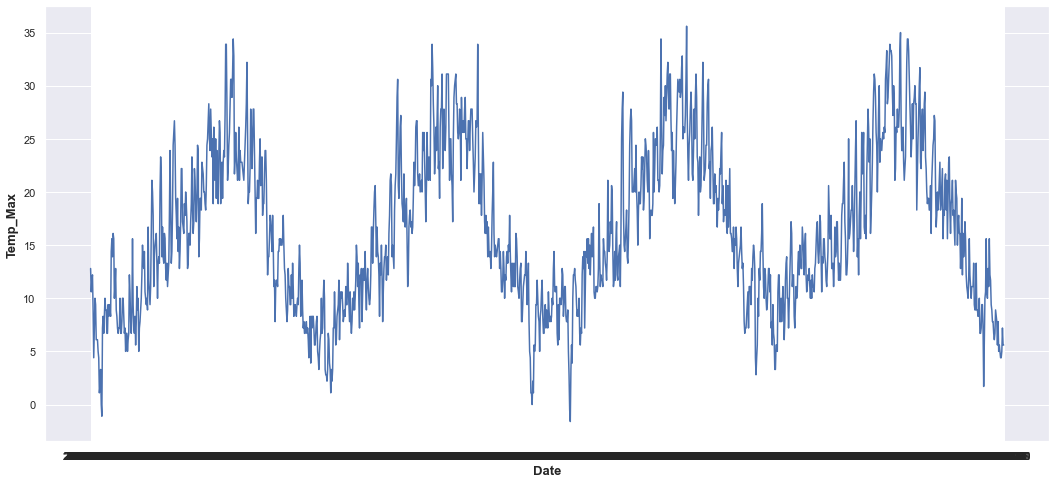

In [52]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_max',data=df)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Max",fontweight='bold',size=13)
plt.show()

In [59]:
opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt,
              loss='mean_squared_error',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
37/37 [==============================] - 0s 4ms/step - loss: 54.2193 - accuracy: 0.5565 - val_loss: 24.0534 - val_accuracy: 0.5802
Epoch 2/10
37/37 [==============================] - 0s 1ms/step - loss: 54.2193 - accuracy: 0.5565 - val_loss: 24.0534 - val_accuracy: 0.5802
Epoch 3/10
37/37 [==============================] - 0s 1ms/step - loss: 54.2193 - accuracy: 0.5565 - val_loss: 24.0534 - val_accuracy: 0.5802
Epoch 4/10
37/37 [==============================] - 0s 1ms/step - loss: 54.2193 - accuracy: 0.5565 - val_loss: 24.0534 - val_accuracy: 0.5802
Epoch 5/10
37/37 [==============================] - 0s 2ms/step - loss: 54.2193 - accuracy: 0.5565 - val_loss: 24.0534 - val_accuracy: 0.5802
Epoch 6/10
37/37 [==============================] - 0s 1ms/step - loss: 54.2193 - accuracy: 0.5565 - val_loss: 24.0534 - val_accuracy: 0.5802
Epoch 7/10
37/37 [==============================] - 0s 1ms/step - loss: 54.2193 - accuracy: 0.5565 - val_loss: 24.0534 - val_accuracy: 0.5802
Epoch 

In [61]:
#Now let's make a simple neural network with 1 hidden layer containing 10 neurons
num_neurons = 50 # neurons in each layer
model = Sequential()

#Make the first (hidden) layer, which will have num_neurons neurons. Each neuron will get inputs from all columns of the dataframe, except sentiment
#model.add(Dense(num_neurons, input_dim=len(data.columns)-1))
model.add(Dense(num_neurons, input_dim=np.shape(X_train)[1]))
model.add(Activation('relu')) #Now we'll use a sigmoid activation function

#model.add(Dense(10, input_dim=50))
model.add(Dense(num_neurons))
model.add(Activation('relu'))

model.add(Dense(num_neurons))
model.add(Activation('relu'))

#Now let's add another layer for the output: A single sigmoid neuron.
model.add(Dense(1)) 
model.add(Activation('relu'))

In [63]:
opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
37/37 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.5668 - val_loss: nan - val_accuracy: 0.6007
Epoch 2/10
37/37 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5668 - val_loss: nan - val_accuracy: 0.6007
Epoch 3/10
37/37 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5668 - val_loss: nan - val_accuracy: 0.6007
Epoch 4/10
37/37 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5668 - val_loss: nan - val_accuracy: 0.6007
Epoch 5/10
37/37 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5668 - val_loss: nan - val_accuracy: 0.6007
Epoch 6/10
37/37 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5668 - val_loss: nan - val_accuracy: 0.6007
Epoch 7/10
37/37 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5668 - val_loss: nan - val_accuracy: 0.6007
Epoch 8/10
37/37 [==============================] - 0s 1ms/ste

In [65]:
data_weather = df[['precipitation','weather']]
data_weather.set_index('precipitation',drop=True,inplace=True)

In [66]:
data_weather

,weather
precipitation,
0.0,drizzle
10.9,rain
0.8,rain
20.3,rain
1.3,rain
...,...
8.6,rain
1.5,rain
0.0,fog


In [70]:
#Only use date and precipitation 2 colums, so exclude any other informations

data_prec = df[['date','precipitation']].iloc[:1460,:]
data_prec.set_index('date',drop=True,inplace=True)

In [71]:
data_prec

,precipitation
date,
2012-01-01,0.0
2012-01-02,10.9
2012-01-03,0.8
2012-01-04,20.3
2012-01-05,1.3
...,...
2015-12-26,0.0
2015-12-27,8.6
2015-12-28,1.5


In [74]:
#Applying a scaler for regression

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_prec[data_prec.columns] = scaler.fit_transform(data_prec)

In [75]:
data_prec

,precipitation
date,
2012-01-01,0.000000
2012-01-02,0.194991
2012-01-03,0.014311
2012-01-04,0.363148
2012-01-05,0.023256
...,...
2015-12-26,0.000000
2015-12-27,0.153846
2015-12-28,0.026834


In [76]:
#Splitting in training and testing samples

training_size = round(len(data_prec) * 0.80)
train_data = data_prec[:training_size]
test_data  = data_prec[training_size:]

In [77]:
#Using timeseries_dataset_from_array function to add timeseries and make the shape of X_train has 3 digits. https://keras.io/api/preprocessing/timeseries/

def create_sequence(dataset,sequence_len):
  sequences = []
  labels = []
  start_idx = 0
  for stop_idx in range(sequence_len,len(dataset)): 
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [78]:
X_train, y_train = create_sequence(train_data,100)
X_test, y_test = create_sequence(test_data,100)

In [79]:
np.shape(X_train)

(1068, 100, 1)

In [80]:
np.shape(X_test)

(192, 100, 1)

In [86]:
len(X_train[0][0])

1

In [87]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])

In [88]:
timesteps

100

In [105]:
epochs = 30

#batch_size = 32

n_hidden = 64

model = Sequential()
model.add(LSTM(n_hidden, return_sequences=True, input_shape=(timesteps, input_dim))) #an LSTM layer
model.add(Dropout(0.2)) 
#model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=epochs, verbose = 1)



Epoch 1/30


ValueError: in user code:

    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\keras\losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\keras\backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 100) are incompatible


In [101]:
epochs = 30

#batch_size = 32

n_hidden = 64

model = Sequential()
model.add(LSTM(n_hidden, return_sequences=True, input_shape=(timesteps, input_dim))) #an LSTM layer
model.add(Dropout(0.2)) 
#model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', 
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train,y_train, epochs=epochs, validation_data=(X_test, y_test), verbose = 1)

#print(confusion_matrix(Y_test, model.predict(X_test)))

Epoch 1/30
34/34 [==============================] - 2s 29ms/step - loss: 0.0130 - accuracy: 0.5824 - val_loss: 0.0242 - val_accuracy: 0.5990
Epoch 2/30
34/34 [==============================] - 1s 21ms/step - loss: 0.0128 - accuracy: 0.5824 - val_loss: 0.0246 - val_accuracy: 0.5990
Epoch 3/30
34/34 [==============================] - 1s 20ms/step - loss: 0.0129 - accuracy: 0.5824 - val_loss: 0.0245 - val_accuracy: 0.5990
Epoch 4/30
34/34 [==============================] - 1s 20ms/step - loss: 0.0128 - accuracy: 0.5824 - val_loss: 0.0247 - val_accuracy: 0.5990
Epoch 5/30
34/34 [==============================] - 1s 20ms/step - loss: 0.0128 - accuracy: 0.5824 - val_loss: 0.0244 - val_accuracy: 0.5990
Epoch 6/30
34/34 [==============================] - 1s 20ms/step - loss: 0.0128 - accuracy: 0.5824 - val_loss: 0.0245 - val_accuracy: 0.5990
Epoch 7/30
34/34 [==============================] - 1s 22ms/step - loss: 0.0127 - accuracy: 0.5824 - val_loss: 0.0243 - val_accuracy: 0.5990
Epoch 8/30
34

In [100]:
#Creating LSTM for regression

epochs = 30

#batch_size = 32

n_hidden = 64

model = Sequential()
model.add(LSTM(n_hidden, return_sequences=True, input_shape=(timesteps, input_dim))) #an LSTM layer
model.add(Dropout(0.2)) 
#model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', 
              optimizer='adam',
              metrics=['mean_absolute_error'])

history = model.fit(X_train,y_train, epochs=epochs, validation_data=(X_test, y_test), verbose = 1)

print(confusion_matrix(Y_test, model.predict(X_test)))

Epoch 1/30
34/34 [==============================] - 2s 28ms/step - loss: 0.0131 - mean_absolute_error: 0.0694 - val_loss: 0.0244 - val_mean_absolute_error: 0.0863
Epoch 2/30
34/34 [==============================] - 1s 23ms/step - loss: 0.0128 - mean_absolute_error: 0.0703 - val_loss: 0.0246 - val_mean_absolute_error: 0.0853
Epoch 3/30
34/34 [==============================] - 1s 22ms/step - loss: 0.0128 - mean_absolute_error: 0.0702 - val_loss: 0.0246 - val_mean_absolute_error: 0.0852
Epoch 4/30
34/34 [==============================] - 1s 21ms/step - loss: 0.0127 - mean_absolute_error: 0.0713 - val_loss: 0.0249 - val_mean_absolute_error: 0.0823
Epoch 5/30
34/34 [==============================] - 1s 22ms/step - loss: 0.0128 - mean_absolute_error: 0.0692 - val_loss: 0.0241 - val_mean_absolute_error: 0.0916
Epoch 6/30
34/34 [==============================] - 1s 22ms/step - loss: 0.0127 - mean_absolute_error: 0.0713 - val_loss: 0.0246 - val_mean_absolute_error: 0.0848
Epoch 7/30
34/34 [====

NameError: name 'confusion_matrix' is not defined

In [106]:
epochs = 50

#batch_size = 32

n_hidden = 64

model = Sequential()
model.add(LSTM(n_hidden, return_sequences=True, input_shape=(timesteps, input_dim))) #an LSTM layer
model.add(Dropout(0.2)) 
#model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', 
              optimizer='adam',
              metrics=['mean_absolute_error'])


In [107]:
history = model.fit(X_train,y_train, epochs=epochs, validation_data=(X_test, y_test), verbose = 1)


Epoch 1/50
34/34 [==============================] - 2s 33ms/step - loss: 0.0131 - mean_absolute_error: 0.0692 - val_loss: 0.0245 - val_mean_absolute_error: 0.0843
Epoch 2/50
34/34 [==============================] - 1s 27ms/step - loss: 0.0128 - mean_absolute_error: 0.0694 - val_loss: 0.0243 - val_mean_absolute_error: 0.0881
Epoch 3/50
34/34 [==============================] - 1s 27ms/step - loss: 0.0128 - mean_absolute_error: 0.0705 - val_loss: 0.0246 - val_mean_absolute_error: 0.0848
Epoch 4/50
34/34 [==============================] - 1s 27ms/step - loss: 0.0128 - mean_absolute_error: 0.0718 - val_loss: 0.0245 - val_mean_absolute_error: 0.0868
Epoch 5/50
34/34 [==============================] - 1s 27ms/step - loss: 0.0129 - mean_absolute_error: 0.0713 - val_loss: 0.0252 - val_mean_absolute_error: 0.0790
Epoch 6/50
34/34 [==============================] - 1s 27ms/step - loss: 0.0128 - mean_absolute_error: 0.0700 - val_loss: 0.0245 - val_mean_absolute_error: 0.0859
Epoch 7/50
34/34 [====

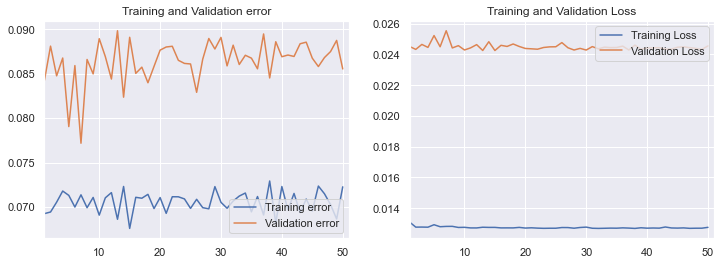

In [110]:
#Plot of error and loss
error = history.history['mean_absolute_error']
val_error = history.history['val_mean_absolute_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(val_error)+1)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, error, label='Training error')
plt.plot(epochs_range, val_error, label='Validation error')
plt.legend(loc='lower right')
plt.xlim(1, len(val_error)+1)
plt.title('Training and Validation error')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlim(1, len(val_error)+1)
plt.title('Training and Validation Loss')
plt.show()

In [114]:
test_predicted = model.predict(X_test)

ValueError: x and y can be no greater than 2D, but have shapes (192,) and (192, 100, 1)

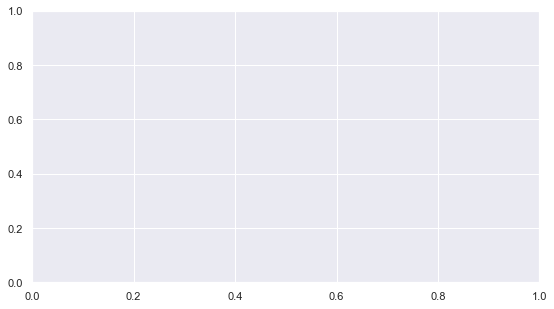

In [113]:
#Ploting the prediciton of precipitation
fig=plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(test_predicted,label='precipitation, predicted')
plt.plot(y_test,label="precipitation")
plt.title('Prediction of Seattle weather')
plt.legend()

In [117]:
epochs = 50

batch_size = 32

n_hidden = 64

model = Sequential()
model.add(LSTM(n_hidden, return_sequences=True, input_shape=(timesteps, input_dim))) #an LSTM layer
model.add(Dropout(0.2)) 
model.add(Dense(10, activation='sigmoid'))
#model.add(Dense(1))

model.compile(loss='mean_squared_error', 
              optimizer='adam',
              metrics=['mean_absolute_error'])

history = model.fit(X_train,y_train,batch_size=batch_size,validation_data=(X_test, y_test),epochs=epochs,  verbose = 1)


Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/mean_squared_error/BroadcastGradientArgs' defined at (most recent call last):
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\glooooooria\AppData\Local\Temp\ipykernel_51676\3450379968.py", line 17, in <cell line: 17>
      history = model.fit(X_train,y_train,batch_size=batch_size,validation_data=(X_test, y_test),epochs=epochs,  verbose = 1)
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\keras\engine\training.py", line 863, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 530, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 583, in _compute_gradients
      grads_and_vars = self._get_gradients(tape, loss, var_list, grad_loss)
    File "C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 464, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/mean_squared_error/BroadcastGradientArgs'
Incompatible shapes: [32,100,10] vs. [32,1]
	 [[{{node gradient_tape/mean_squared_error/BroadcastGradientArgs}}]] [Op:__inference_train_function_92696]

In [118]:
epochs = 50

#batch_size = 32

n_hidden = 64

model = Sequential()
model.add(LSTM(n_hidden, return_sequences=True, input_shape=(timesteps, input_dim))) #an LSTM layer
model.add(Dropout(0.1)) 
#model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', 
              optimizer='adam',
              metrics=['mean_absolute_error'])

history = model.fit(X_train,y_train, epochs=epochs, validation_data=(X_test, y_test), verbose = 1)

Epoch 1/50
34/34 [==============================] - 2s 28ms/step - loss: 0.0129 - mean_absolute_error: 0.0676 - val_loss: 0.0241 - val_mean_absolute_error: 0.0972
Epoch 2/50
34/34 [==============================] - 1s 21ms/step - loss: 0.0129 - mean_absolute_error: 0.0725 - val_loss: 0.0244 - val_mean_absolute_error: 0.0862
Epoch 3/50
34/34 [==============================] - 1s 21ms/step - loss: 0.0128 - mean_absolute_error: 0.0716 - val_loss: 0.0244 - val_mean_absolute_error: 0.0868
Epoch 4/50
34/34 [==============================] - 1s 21ms/step - loss: 0.0128 - mean_absolute_error: 0.0687 - val_loss: 0.0240 - val_mean_absolute_error: 0.0955
Epoch 5/50
34/34 [==============================] - 1s 22ms/step - loss: 0.0128 - mean_absolute_error: 0.0711 - val_loss: 0.0245 - val_mean_absolute_error: 0.0859
Epoch 6/50
34/34 [==============================] - 1s 24ms/step - loss: 0.0128 - mean_absolute_error: 0.0694 - val_loss: 0.0241 - val_mean_absolute_error: 0.0924
Epoch 7/50
34/34 [====

In [119]:
epochs = 50

#batch_size = 32

n_hidden = 64

model = Sequential()
model.add(LSTM(n_hidden, return_sequences=True, input_shape=(timesteps, input_dim))) #an LSTM layer
model.add(Dropout(0.1)) 
#model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.05),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])


history = model.fit(X_train,y_train, epochs=epochs, validation_data=(X_test, y_test), verbose = 1)

Epoch 1/50


C:\Users\glooooooria\anaconda3\envs\emi\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 2s 28ms/step - loss: 4.7135 - sparse_categorical_accuracy: 0.5646 - val_loss: 4.6052 - val_sparse_categorical_accuracy: 0.5990
Epoch 2/50
34/34 [==============================] - 1s 21ms/step - loss: 4.6052 - sparse_categorical_accuracy: 0.5824 - val_loss: 4.6052 - val_sparse_categorical_accuracy: 0.5990
Epoch 3/50
34/34 [==============================] - 1s 23ms/step - loss: 4.6052 - sparse_categorical_accuracy: 0.5824 - val_loss: 4.6052 - val_sparse_categorical_accuracy: 0.5990
Epoch 4/50
34/34 [==============================] - 1s 21ms/step - loss: 4.6052 - sparse_categorical_accuracy: 0.5824 - val_loss: 4.6052 - val_sparse_categorical_accuracy: 0.5990
Epoch 5/50
34/34 [==============================] - 1s 21ms/step - loss: 4.6052 - sparse_categorical_accuracy: 0.5824 - val_loss: 4.6052 - val_sparse_categorical_accuracy: 0.5990
Epoch 6/50
34/34 [==============================] - 1s 22ms/step - loss: 4.6052 - sparse_categorical_accuracy: 0.582

34/34 [==============================] - 1s 23ms/step - loss: 4.6052 - sparse_categorical_accuracy: 0.5824 - val_loss: 4.6052 - val_sparse_categorical_accuracy: 0.5990
Epoch 47/50
34/34 [==============================] - 1s 23ms/step - loss: 4.6052 - sparse_categorical_accuracy: 0.5824 - val_loss: 4.6052 - val_sparse_categorical_accuracy: 0.5990
Epoch 48/50
34/34 [==============================] - 1s 23ms/step - loss: 4.6052 - sparse_categorical_accuracy: 0.5824 - val_loss: 4.6052 - val_sparse_categorical_accuracy: 0.5990
Epoch 49/50
34/34 [==============================] - 1s 23ms/step - loss: 4.6052 - sparse_categorical_accuracy: 0.5824 - val_loss: 4.6052 - val_sparse_categorical_accuracy: 0.5990
Epoch 50/50
34/34 [==============================] - 1s 21ms/step - loss: 4.6052 - sparse_categorical_accuracy: 0.5824 - val_loss: 4.6052 - val_sparse_categorical_accuracy: 0.5990
